<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#ggraph" data-toc-modified-id="ggraph-5">ggraph</a></span></li><li><span><a href="#Covid---incidence-matrix" data-toc-modified-id="Covid---incidence-matrix-6">Covid - incidence matrix</a></span><ul class="toc-item"><li><span><a href="#community-detection" data-toc-modified-id="community-detection-6.1">community detection</a></span></li></ul></li><li><span><a href="#Covid---adjacency-matrix" data-toc-modified-id="Covid---adjacency-matrix-7">Covid - adjacency matrix</a></span><ul class="toc-item"><li><span><a href="#community-detection" data-toc-modified-id="community-detection-7.1">community detection</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
pacman::p_load(igraph, graphlayouts, ggraph, ggforce, dplyr)

# Functions

In [2]:
#source("/Users/anabbi/git/ped_CapTCRseq/R/Immune_diversity.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"

gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [4]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/"

# Main

In [5]:
load(file = paste0(datapath, "capTCRseq/gliph_int_covid_tcr.RData"))

In [7]:
gliphoutput <- read.csv(paste0(h4hpath,'/GLIPH/int_covid_tcr_cluster.csv'), header = T)

In [8]:
dim(gliphoutput)

[1] 301942     29

In [9]:
head(gliph_int_covid_tcr)

,CDR3b,TRBV,TRBJ,CDR3a,subject:condition,count,clonefraction,subject,file,index
,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,CAIRDPEQGITDTQYF,TRBV10-3,TRBJ2-3,NA,CHP_315:1,24,0.025369979,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,1
2,CAIRGTGADQPQHF,TRBV10-3,TRBJ1-5,NA,CHP_315:2,21,0.022198732,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,2
3,CAISGVWGGDTQYF,TRBV10-3,TRBJ2-3,NA,CHP_315:3,12,0.012684989,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,3
4,CASRLAGTGSPLHF,TRBV6-1,TRBJ1-6,NA,CHP_315:4,2,0.002114165,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,4
5,CASSDPQGTEAFF,TRBV6-2,TRBJ1-1,NA,CHP_315:5,21,0.022198732,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,5
6,CASSEEPGTSGYNEQFF,TRBV2,TRBJ2-1,NA,CHP_315:6,6,0.006342495,CHP_315-05-PBMC-DNA,/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_315-05-PBMC-DNA.txt,6


map back to the original data

In [10]:
gliph_all <- merge(gliph_int_covid_tcr, gliphoutput, 
                   by.x = "subject:condition", by.y = "Sample", all = T)

In [11]:
dim(gliphoutput)

[1] 301942     29

In [12]:
#remove HLA cols they are empty
HLAcol <- colnames(gliph_all)[!grepl("HLA", colnames(gliph_all))]
gliph_all <- gliph_all[, ..HLAcol]

In [71]:
colnames(gliph_all)

[1] "subject:condition"  "CDR3b"              "TRBV"              
 [4] "TRBJ"               "CDR3a"              "count"             
 [7] "clonefraction"      "subject"            "file"              
[10] "index.x"            "index.y"            "pattern"           
[13] "Fisher_score"       "number_subject"     "number_unique_cdr3"
[16] "final_score"        "hla_score"          "vb_score"          
[19] "expansion_score"    "length_score"       "cluster_size_score"
[22] "type"               "TcRb"               "V"                 
[25] "J"                  "TcRa"               "Freq"

In [14]:
save(gliph_all, file = paste0(datapath, "GLIPH/gliph_all.RData"))

# ggraph

In [5]:
load(file = paste0(datapath, "GLIPH/gliph_all.RData"))

In [6]:
gliph_rm_na <- gliph_all[ !is.na(gliph_all$pattern),]

In [7]:
dim(gliph_all)

[1] 405687     27

In [8]:
dim(gliph_rm_na)

[1] 301942     27

In [9]:
gliph_rm_na_singlerm <- gliph_rm_na[ gliph_rm_na$pattern != "single",]

# Covid - incidence matrix

In [10]:
covid <- gliph_rm_na_singlerm[ grepl("COVID", gliph_rm_na_singlerm$file),]

In [11]:
covid$sampleID <- gsub(":.*", "", covid$`subject:condition`)

In [12]:
head(covid)

,subject:condition,CDR3b,TRBV,TRBJ,CDR3a,count,clonefraction,subject,file,index.x,⋯,expansion_score,length_score,cluster_size_score,type,TcRb,V,J,TcRa,Freq,sampleID
,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>
128049,eAM13:101144,CASSSLDRSYNEQFF,TRBV27-01,TRBJ02-01,NA,1,1,eAM13,COVID_specific_TCRB.tsv,101144,⋯,1.00,0.001,0.0290,global-SS%DRSYNE,CASSSLDRSYNEQFF,TRBV27-01,TRBJ02-01,NA,1,eAM13
128050,eAM13:101144,CASSSLDRSYNEQFF,TRBV27-01,TRBJ02-01,NA,1,1,eAM13,COVID_specific_TCRB.tsv,101144,⋯,1.00,0.001,0.0290,global-SSLDR%YNE,CASSSLDRSYNEQFF,TRBV27-01,TRBJ02-01,NA,1,eAM13
128055,eAM13:106112,CASSTGFTGEQYF,TRBV27-01,TRBJ02-07,NA,1,1,eAM13,COVID_specific_TCRB.tsv,106112,⋯,0.20,0.001,0.0290,global-S%GFTGE,CASSTGFTGEQYF,TRBV27-01,TRBJ02-07,NA,1,eAM13
128056,eAM13:106112,CASSTGFTGEQYF,TRBV27-01,TRBJ02-07,NA,1,1,eAM13,COVID_specific_TCRB.tsv,106112,⋯,0.06,0.001,0.0023,global-STG%TGE,CASSTGFTGEQYF,TRBV27-01,TRBJ02-07,NA,1,eAM13
128057,eAM13:108332,CASSVAGARNSPLHF,TRBV09-01,TRBJ01-06,NA,1,1,eAM13,COVID_specific_TCRB.tsv,108332,⋯,1.00,0.001,0.0290,global-SVAGA%NSP,CASSVAGARNSPLHF,TRBV09-01,TRBJ01-06,NA,1,eAM13
128058,eAM13:110597,CASSVGVGSTDTQYF,TRBV07-08,TRBJ02-03,NA,1,1,eAM13,COVID_specific_TCRB.tsv,110597,⋯,0.31,0.001,0.0015,global-S%GVGSTDT,CASSVGVGSTDTQYF,TRBV07-08,TRBJ02-03,NA,1,eAM13


In [13]:
dim(covid)

[1] 207309     28

In [14]:
# number of pt
covid <- covid[ covid$number_subject > 1,]

In [15]:
dim(covid)

[1] 200559     28

In [16]:
# number of cdr3
covid <- covid[ covid$number_unique_cdr3 > 5,]

In [17]:
dim(covid)

[1] 52303    28

In [18]:
# fisher threshold
covid <- covid[ covid$Fisher_score < 0.0001,]

In [19]:
dim(covid)

[1] 8303   28

In [20]:
covid_meta <- read.csv(file = "~/Downloads/ImmuneCODE-MIRA-Release002.1/subject-metadata.csv")

In [21]:
head(covid_meta)

,Experiment,Subject,Cell.Type,Target.Type,Cohort,Age,Gender,Race,HLA.A,HLA.A.1,⋯,DQB1,DQB1.1,DRB1,DRB1.1,DRB3,DRB3.1,DRB4,DRB4.1,DRB5,DRB5.1
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,eAM13,844,PBMC,C19_cI,COVID-19-Convalescent,34,F,White,A*02:01:01,A*02:05:01,⋯,DQB1*02:01:01,DQB1*03:01:01,DRB1*03:01:01,DRB1*13:05:01,DRB3*01:01:02,DRB3*02:02:01,,,,
2,eAM23,5422,PBMC,C19_cI,COVID-19-Convalescent,48,M,N/A,A*11:01:01,A*24:02:01,⋯,DQB1*03:02:01,DQB1*06:01:01,DRB1*04:06:01,DRB1*15:02:01,DRB4*01:03:01,DRB5*01:02,,,,
3,eAV100,1995,PBMC,C19_cII,COVID-19-Convalescent,29,F,N/A,A*02:01:01,A*68:01:02,⋯,DQB1*03:01:01,DQB1*06:02:01,DRB1*11:01:01,DRB1*15:01:01,DRB3*02:02:01,,,,DRB5*01:01:01,
4,eAV105,1995,PBMC,C19_cII,COVID-19-Convalescent,29,F,N/A,A*02:01:01,A*68:01:02,⋯,DQB1*03:01:01,DQB1*06:02:01,DRB1*11:01:01,DRB1*15:01:01,DRB3*02:02:01,,,,DRB5*01:01:01,
5,eAV88,19830,naive_CD8,C19_cI,Healthy (No known exposure),24,M,White,A*02:01,A*03:01,⋯,DQB1*03:02,DQB1*03:03,DRB1*04:04,DRB1*09:01,,,DRB4*01:03,DRB4*01:03,,
6,eAV91,19855,naive_CD8,C19_cI,Healthy (No known exposure),31,M,White,A*03:01,A*68:01,⋯,DQB1*05:01,DQB1*06:02,DRB1*13:01,DRB1*15:01,DRB3*01:01,,,,,DRB5*01:01


In [24]:
# only pbmc
pbmc_samples <- covid_meta$Experiment[ covid_meta$Cell.Type == "PBMC"]

In [26]:
covid <- covid[ covid$sampleID %in% pbmc_samples,]

In [27]:
dim(covid)

[1] 2616   28

Make an incidence matrix

In [73]:
mymat <- table(covid$TcRb, covid$type)

In [131]:
#graph
g <- graph_from_incidence_matrix(mymat)

In [132]:
#add sample id for cdr3
V(g)$subject <- sapply(V(g)$name, function(x){
    covid$sampleID[match(x, covid$TcRb)]
}
                                    )

In [133]:
#add sample id for clusters
V(g)$subject[is.na(V(g)$subject)] <- sapply(V(g)$name[is.na(V(g)$subject)], function(x){
    covid$sampleID[match(x, covid$type)]
}
                                    )

In [134]:
# add cohort for cdr3 and clusters
V(g)$Cohort <- sapply(V(g)$subject, function(x){
    covid_meta$Cohort[match(x, covid_meta$Experiment)]
}
                                    )

In [138]:
?degree()

In [125]:
g <- delete_vertices(g,  which(degree(g) == 1) )

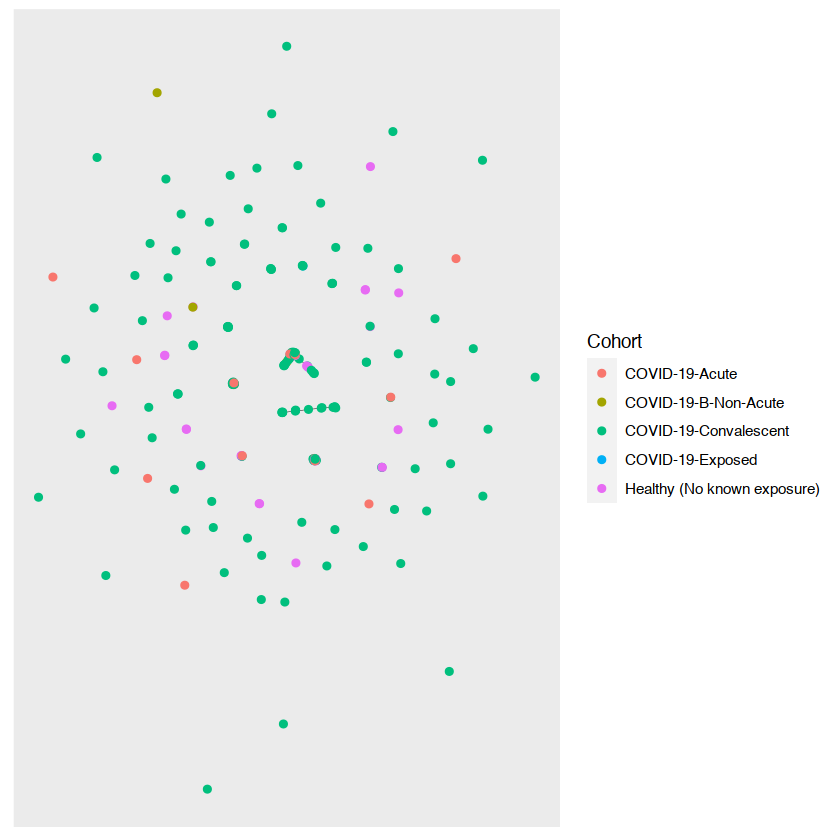

In [130]:
ggraph(bipartite.projection(g)$proj2 , "drl" ) +
geom_edge_link(edge_width = 0.1 ,edge_colour = "#000000") +
geom_node_point(aes(color  = Cohort))

## community detection

IGRAPH 34a4783 UN-B 2007 2267 -- 
+ attr: type (v/l), name (v/c), subject (v/c), Cohort (v/c)
+ edges from 34a4783 (vertex names):
 [1] CAADNEQFF     --global-%NE      CAAGDRGPADTQYF--global-GDRG%ADT
 [3] CAAGEANTGELFF --global-%EANTGE  CAAGEANTGELFF --global-G%ANTGE 
 [5] CAAGEANTGELFF --global-GE%NTGE  CAAGEMNTGELFF --global-%EMNTGE 
 [7] CAAGEMNTGELFF --global-G%MNTGE  CAAGEMNTGELFF --global-GE%NTGE 
 [9] CAAGEQNTGELFF --global-%EQNTGE  CAAGEQNTGELFF --global-GE%NTGE 
[11] CAAGHANTGELFF --global-G%ANTGE  CAAGSSNTGELFF --global-G%SNTGE 
[13] CAAQDLNTGELFF --global-%DLNTGE  CAAQDLNTGELFF --global-Q%LNTGE 
[15] CAAQDLNTGELFF --global-QD%NTGE  CAAQDLNTGELFF --global-QDL%TGE 
+ ... omitted several edges

# Covid - adjacency matrix

Make an sample x cluster frequency matrix 

In [139]:
mymat <- matrix(nrow = length(unique(covid$sampleID)), ncol = length(unique(covid$type)),
               dimnames = list(unique(covid$sampleID), unique(covid$type)))

In [140]:
for(s in unique(covid$sampleID)){
    mysample <- covid[ covid$sampleID == s,]
    mytab <- table(mysample$type)
    mymat[s,rownames(mytab)] <- mytab
}

In [142]:
head(mymat)

,global-S%GDT,global-SLG%GNE,global-S%GGE,global-S%RDRGEYNE,global-S%TGDE,global-S%GGYE,global-GE%NTGE,global-G%ENTGE,global-SL%GE,global-S%TGE,⋯,global-RGLAGG%YE,global-SLS%TGE,global-SIGLG%AYE,global-SIGLGLA%E,global-SIGQG%SYE,global-SIGQGL%YE,global-SIGTGI%YE,global-S%GQGFSYE,global-S%GQGISYE,global-SIGTGLG%E
eAM13,1,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
eAM23,NA,NA,1,1,2,1,1,1,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
eAV100,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
eAV105,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
eDH105,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
eDH113,NA,1,NA,NA,NA,NA,NA,NA,NA,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [143]:
# convert NA to 0
mymat[ is.na(mymat)] <- 0

In [144]:
# correlation
mycormat <- cor(t(mymat), method = "spearman")

In [145]:
# convert negative correlation to 0
mycormat[mycormat < 0] <- 0

In [146]:
#graph
g <- graph_from_adjacency_matrix(mycormat, mode = "undirected", weighted = TRUE, diag = FALSE)

In [147]:
head(V(g)$name)

[1] "eAM13"  "eAM23"  "eAV100" "eAV105" "eDH105" "eDH113"

In [148]:
covid_meta <- read.csv(file = "~/Downloads/ImmuneCODE-MIRA-Release002.1/subject-metadata.csv")

In [149]:
V(g)$Cohort <- sapply(V(g)$name, function(x){
    covid_meta$Cohort[match(x, covid_meta$Experiment)]
}
                                    )

In [150]:
head(V(g)$Cohort)

[1] "COVID-19-Convalescent"       "COVID-19-Convalescent"      
[3] "COVID-19-Convalescent"       "COVID-19-Convalescent"      
[5] "COVID-19-Convalescent"       "Healthy (No known exposure)"

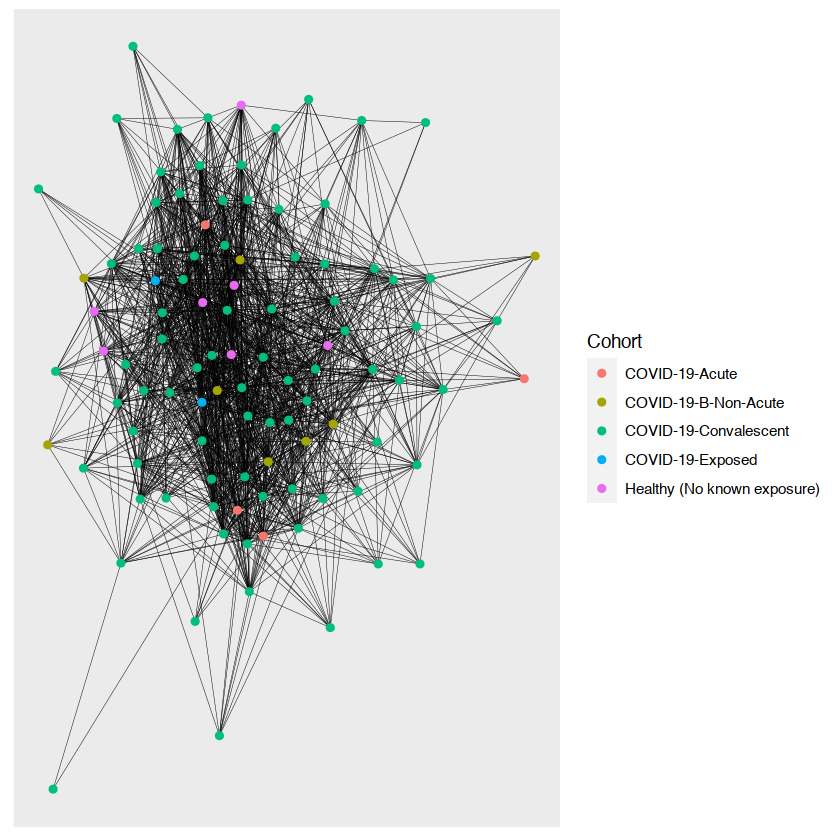

In [152]:
ggraph(g , "fr" ) +
geom_edge_link(edge_width = 0.1 ,edge_colour = "#000000") +
geom_node_point(aes(color  = Cohort))

## community detection

In [194]:
ls()

[1] "colrs"                "covid"                "covid_meta"          
 [4] "datapath"             "dend"                 "g"                   
 [7] "g1"                   "gitpath"              "gliph_all"           
[10] "gliph_rm_na"          "gliph_rm_na_singlerm" "h4hpath"             
[13] "links"                "manifestpath"         "mycormat"            
[16] "mylayout"             "mymat"                "mysample"            
[19] "mytab"                "net"                  "nodes"               
[22] "pbmc_samples"         "plotpath"             "s"

[1] 0.1092342

[1] 0.09387763

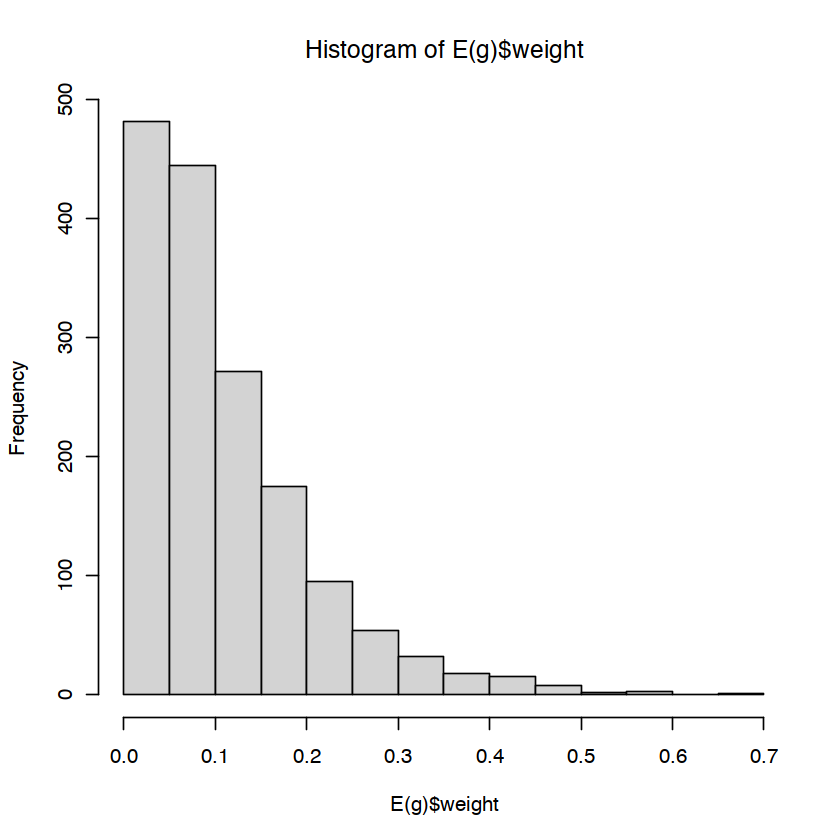

In [198]:
hist(E(g)$weight)

mean(E(g)$weight)

sd(E(g)$weight)

In [153]:
dend <- cluster_edge_betweenness(g)

Warning message in cluster_edge_betweenness(g):
“At core/community/edge_betweenness.c:485 : Membership vector will be selected based on the lowest modularity score.”
Warning message in cluster_edge_betweenness(g):
“At core/community/edge_betweenness.c:492 : Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances.”


In [236]:
colrs <- structure(c("black", "white", "white", "white", "red"),
                   names = c("COVID-19-Acute", "COVID-19-B-Non-Acute", "COVID-19-Convalescent",
                   "COVID-19-Exposed", "Healthy (No known exposure)"))

In [237]:
V(g)$color <- colrs[match(V(g)$Cohort, names(colrs))]

In [242]:
shapes <- structure(c("circle", "none", "none", "none", "circle"),
                   names = c("COVID-19-Acute", "COVID-19-B-Non-Acute", "COVID-19-Convalescent",
                   "COVID-19-Exposed", "Healthy (No known exposure)"))

In [243]:
V(g)$shape <- shapes[match(V(g)$Cohort, names(shapes))]

In [244]:
mylayout <- layout_with_drl(g)
mylayout <- norm_coords(mylayout, ymin=-1, ymax=1, xmin=-1, xmax=1)

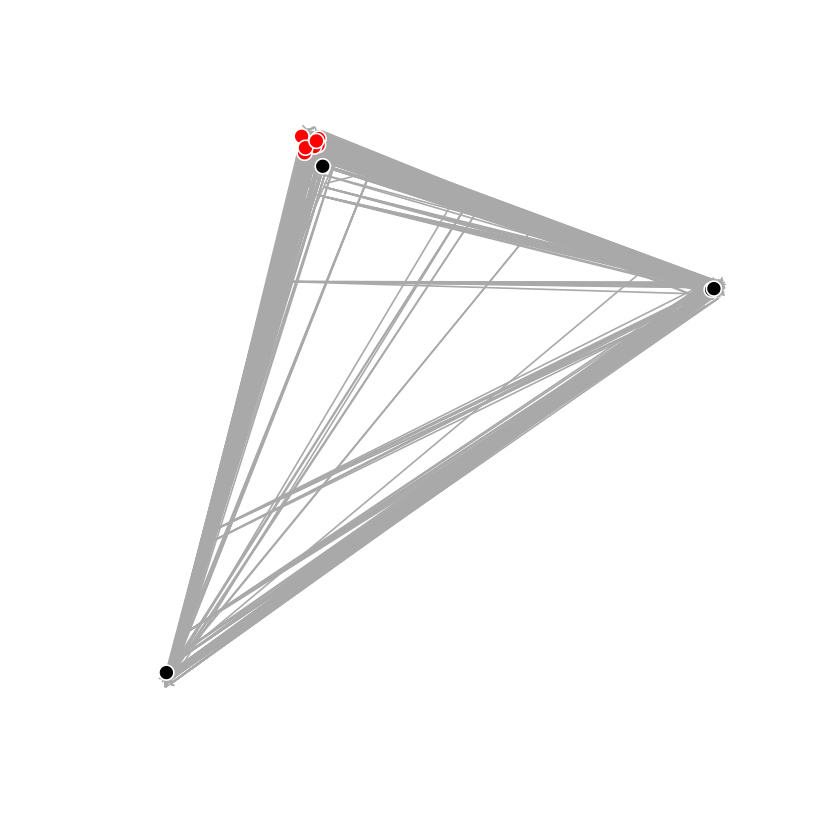

In [245]:
#par(mfrow=c(2,2), mar=c(0,0,0,0))
plot(g, vertex.label=NA, vertex.frame.color="white", vertex.size=5,
     layout = mylayout, rescale = T)

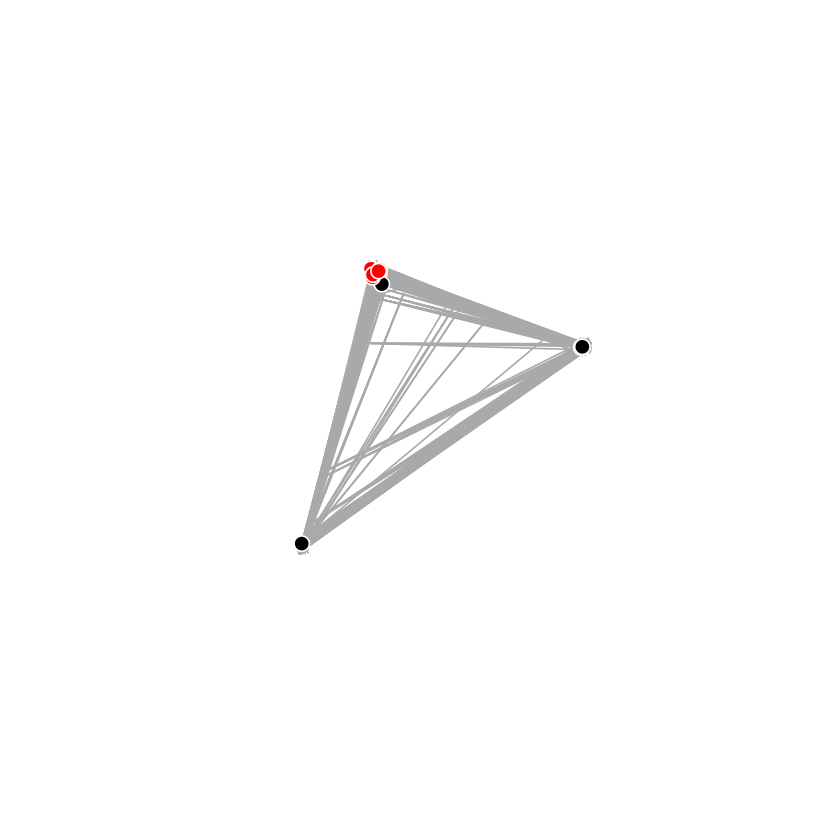

In [253]:
g.sp <- delete_edges(g, E(g)[weight< 0.01])
#mylayout <- layout_with_drl(g.sp)
#mylayout <- norm_coords(mylayout, ymin=-1, ymax=1, xmin=-1, xmax=1)
plot(g.sp, vertex.label=NA, vertex.frame.color="white", vertex.size=5, rescale = F,
     layout = mylayout*0.5)

In [ ]:
plot(net) 

legend(x=-1.5, y=-1.1, c("Newspaper","Television", "Online News"), pch=21,

       col="#777777", pt.bg=colrs, pt.cex=2, cex=.8, bty="n", ncol=1)